# Dogs Vs. Cats Model

The 2nd example from chapter 5.

In [18]:
import os
import re
import random

import pandas as pd

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import matplotlib.pyplot as plt

## Configuration

In [15]:
data_dir  = os.path.join("var", "data")
train_dir = os.path.join(data_dir, "train")
val_dir   = os.path.join(data_dir, "validation")
test_dir  = os.path.join(data_dir, "test")
model_dir = os.path.join("var", "model")

os.makedirs(model_dir, exist_ok=True)

## Load Data

In [3]:
batch_size =20

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

print(f"Classes: {train_generator.class_indices}")

train_steps = len(train_generator.filenames) / batch_size
val_steps = len(validation_generator.filenames) / batch_size

print(f"Train Steps: {train_steps}  Validation Steps: {val_steps}")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Classes: {'cat': 0, 'dog': 1}
Train Steps: 100.0  Validation Steps: 50.0


## Train Model

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=val_steps)

Epoch 1/15
100/100 [==============================] - 36s 356ms/step - loss: 0.5237 - acc: 0.7395 - val_loss: 0.4731 - val_acc: 0.7480
Epoch 2/15
100/100 [==============================] - 41s 414ms/step - loss: 0.5151 - acc: 0.7505 - val_loss: 0.4752 - val_acc: 0.7320
Epoch 3/15
100/100 [==============================] - 41s 414ms/step - loss: 0.5065 - acc: 0.7560 - val_loss: 0.6618 - val_acc: 0.7580
Epoch 4/15
100/100 [==============================] - 43s 427ms/step - loss: 0.5048 - acc: 0.7530 - val_loss: 0.4231 - val_acc: 0.7700
Epoch 5/15
100/100 [==============================] - 41s 415ms/step - loss: 0.4956 - acc: 0.7615 - val_loss: 0.3162 - val_acc: 0.7610
Epoch 6/15
100/100 [==============================] - 42s 420ms/step - loss: 0.5022 - acc: 0.7465 - val_loss: 0.4615 - val_acc: 0.7780
Epoch 7/15
100/100 [==============================] - 42s 423ms/step - loss: 0.4937 - acc: 0.7555 - val_loss: 0.5536 - val_acc: 0.7640
Epoch 8/15
100/100 [==============================] - 4

In [16]:
model.save(f'{model_dir}/cats_and_dogs_small_1.h5')

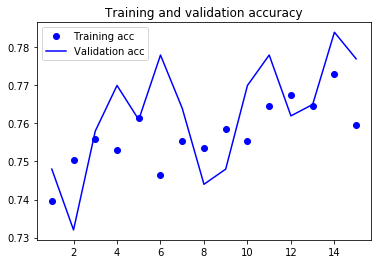

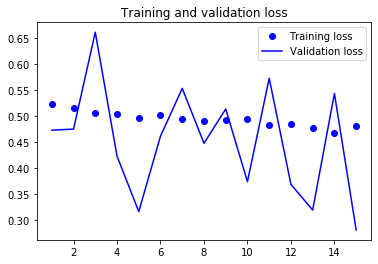

In [17]:
def plot_training_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
plot_training_history(history)

## Setup Image Transformations

In [20]:
train_cats_dir = os.path.join(train_dir, 'cat')

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [36]:
img.shape

AttributeError: 'Image' object has no attribute 'shape'

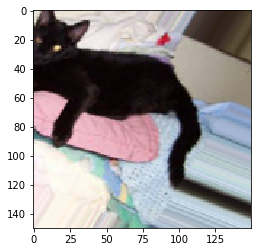

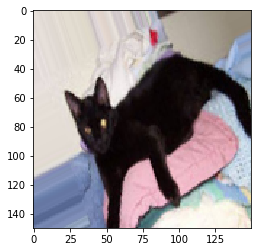

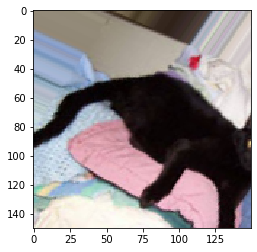

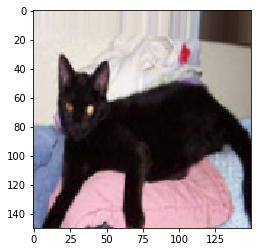

In [32]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = random.choice(fnames)
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

## Training With Image Augmentation

Adds a dropout layer too.

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [35]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=val_steps)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 49s 488ms/step - loss: 0.6929 - acc: 0.5085 - val_loss: 0.6907 - val_acc: 0.5958
Epoch 2/100
100/100 [==============================] - 54s 542ms/step - loss: 0.6827 - acc: 0.5628 - val_loss: 0.6894 - val_acc: 0.6108
Epoch 3/100
100/100 [==============================] - 54s 540ms/step - loss: 0.6686 - acc: 0.5855 - val_loss: 0.6907 - val_acc: 0.6053
Epoch 4/100
100/100 [==============================] - 53s 533ms/step - loss: 0.6565 - acc: 0.6077 - val_loss: 0.6303 - val_acc: 0.6166
Epoch 5/100
100/100 [==============================] - 53s 531ms/step - loss: 0.6427 - acc: 0.6269 - val_loss: 0.5820 - val_acc: 0.6022
Epoch 6/100
100/100 [==============================] - 62s 619ms/step - loss: 0.6391 - acc: 0.6253 - val_loss: 0.6346 - val_acc: 0.6443
Epoch 7/100
100/100 [==============================] - 59s 588ms/step - loss: 0.6337 - acc: 0.6376 -

In [ ]:
model.save(f'{model_dir}/cats_and_dogs_small_2.h5')